# Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Dataset Overview

In [141]:
df = pd.read_csv('Credit_score.csv')
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


# Data Analysis

In [210]:
# Data Summary
df.describe()

,Month,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Type_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour
count,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000,43757.000000
mean,3.500240,6.947048,4033.583573,16.835981,22.564550,76.595836,3148.312201,22.002582,26.816898,1.193798,32.199347,194.126243,1.438101,1413.857801,3.473067
std,2.283146,4.311401,3103.091779,116.656692,128.174119,478.030803,1806.728003,15.219935,186.637385,0.830015,5.059809,113.620485,0.696878,8273.702429,2.030346
min,0.000000,0.000000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,0.000000,20.881250,0.000000,0.000000,4.462837,0.000000
25%,2.000000,3.000000,1575.050417,4.000000,4.000000,8.000000,1510.000000,10.000000,3.000000,0.000000,28.028344,100.000000,1.000000,41.178965,2.000000
50%,3.000000,7.000000,2996.280833,6.000000,6.000000,15.000000,3193.000000,19.000000,6.000000,1.000000,32.219848,177.000000,2.000000,78.597023,3.000000
75%,5.000000,11.000000,5741.443333,8.000000,7.000000,22.000000,4831.000000,29.000000,9.000000,2.000000,36.394823,293.000000,2.000000,169.083971,6.000000
max,7.000000,14.000000,15204.633333,1798.000000,1499.000000,5797.000000,6226.000000,67.000000,2594.000000,2.000000,49.564519,403.000000,2.000000,82331.000000,6.000000


In [143]:
# Feature Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [144]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [145]:
# Display no of rows and columns
df.shape

(100000, 28)

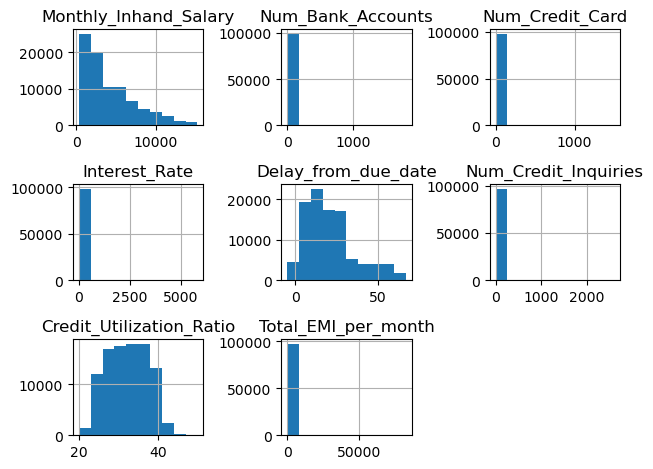

In [146]:
df.hist()
plt.tight_layout()

# Data Cleaning

In [147]:
# Dropping unwanted Data
df = df.drop(columns=['ID','Customer_ID','Name','Age','SSN'])
df

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,May,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,June,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,July,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [148]:
# Check for Missing Values
df.isnull().sum()

Month                           0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [149]:
# Dropping the Missing Values
df = df.dropna()
df

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,July,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,January,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,February,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,March,Teacher,34847.84_,3037.986667,2,1385,6,1,Credit-Builder Loan,3,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,March,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,April,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,May,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,June,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [150]:
# Check for missing values after dropping
df.isnull().sum()

Month                       0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [151]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)
df.drop(df[df["Credit_Mix"]=='_'].index,inplace=True)
df

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,July,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
9,February,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
12,May,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,June,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
15,August,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,February,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7_,39.772607,5 Years and 9 Months,Yes,12112.000000,148.2752327451465,Low_spent_Small_value_payments,273.750662,Poor
99986,March,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,24.713861,5 Years and 10 Months,Yes,60.964772,76.28279349064607,Low_spent_Small_value_payments,345.743101,Poor
99991,August,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,High_spent_Large_value_payments,337.362988,Standard
99997,June,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [152]:
df

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,July,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
9,February,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
12,May,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,June,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
15,August,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,February,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7_,39.772607,5 Years and 9 Months,Yes,12112.000000,148.2752327451465,Low_spent_Small_value_payments,273.750662,Poor
99986,March,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,24.713861,5 Years and 10 Months,Yes,60.964772,76.28279349064607,Low_spent_Small_value_payments,345.743101,Poor
99991,August,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,High_spent_Large_value_payments,337.362988,Standard
99997,June,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [153]:
# removes underscores
df = df.applymap(lambda x:x.replace('_','') if isinstance(x,str) else x)
df

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,July,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,Good
9,February,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,HighspentLargevaluepayments,484.5912142650067,Good
12,May,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,LowspentSmallvaluepayments,444.8670318506144,Good
13,June,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,HighspentLargevaluepayments,481.505261949182,Good
15,August,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,LowspentSmallvaluepayments,356.07810855965045,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,February,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,39.772607,5 Years and 9 Months,Yes,12112.000000,148.2752327451465,LowspentSmallvaluepayments,273.750662,Poor
99986,March,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,24.713861,5 Years and 10 Months,Yes,60.964772,76.28279349064607,LowspentSmallvaluepayments,345.743101,Poor
99991,August,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,HighspentLargevaluepayments,337.362988,Standard
99997,June,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,HighspentLargevaluepayments,516.809083,Poor


In [154]:
df['Payment_Behaviour'].replace('!@9#%8',np.nan)
df

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,July,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,Good
9,February,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,HighspentLargevaluepayments,484.5912142650067,Good
12,May,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,LowspentSmallvaluepayments,444.8670318506144,Good
13,June,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,HighspentLargevaluepayments,481.505261949182,Good
15,August,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.90434353388733,LowspentSmallvaluepayments,356.07810855965045,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,February,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,39.772607,5 Years and 9 Months,Yes,12112.000000,148.2752327451465,LowspentSmallvaluepayments,273.750662,Poor
99986,March,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,24.713861,5 Years and 10 Months,Yes,60.964772,76.28279349064607,LowspentSmallvaluepayments,345.743101,Poor
99991,August,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,Bad,3571.7,37.140784,6 Years and 3 Months,Yes,60.964772,34.66290609052614,HighspentLargevaluepayments,337.362988,Standard
99997,June,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,HighspentLargevaluepayments,516.809083,Poor


<Axes: xlabel='count', ylabel='Occupation'>

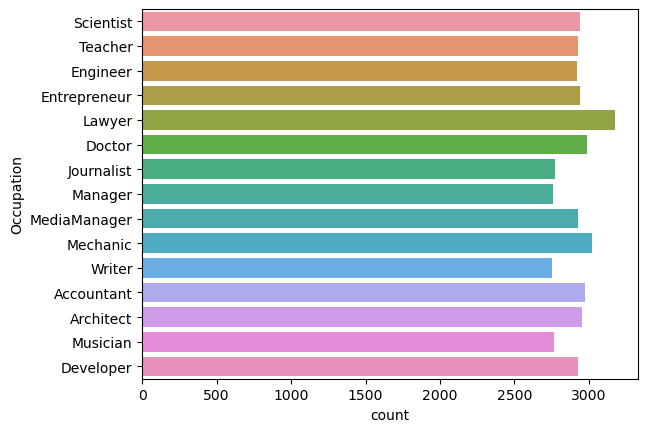

In [155]:
sns.countplot(y='Occupation',data=df)

In [161]:
# Converts Categorical values to Continous Values
cat = ['Month','Occupation','Type_of_Loan','Credit_Mix','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour']
le = LabelEncoder()
for col in cat:
    df[col] = le.fit_transform(df[col])
df

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,4,12,19114.12,1824.843333,3,4,3,4,127,3,...,1,809.98,22.537593,188,1,49.574949,178.3440674122349,6,244.5653167062043,Good
9,2,13,34847.84,3037.986667,2,4,6,1,677,7,...,1,605.03,38.550848,237,1,18.816215,40.39123782853101,1,484.5912142650067,Good
12,7,13,34847.84,3037.986667,2,4,6,1,677,3,...,1,605.03,34.977895,230,1,18.816215,130.11542024292334,6,444.8670318506144,Good
13,5,13,34847.84,3037.986667,2,4,6,1,677,3,...,1,605.03,33.381010,239,1,18.816215,43.477190144355745,1,481.505261949182,Good
15,1,13,34847.84,3037.986667,2,4,6,1,677,3,...,1,605.03,32.933856,243,1,18.816215,218.90434353388733,6,356.07810855965045,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,2,1,20002.88,1929.906667,10,8,29,5,4885,33,...,0,3571.7,39.772607,355,2,12112.000000,148.2752327451465,6,273.750662,Poor
99986,6,1,20002.88,1929.906667,10,8,29,5,4885,33,...,0,3571.7,24.713861,346,2,60.964772,76.28279349064607,6,345.743101,Poor
99991,1,1,20002.88,1929.906667,10,8,29,5,4885,33,...,0,3571.7,37.140784,361,2,60.964772,34.66290609052614,1,337.362988,Standard
99997,5,9,39628.99,3359.415833,4,6,5729,2,676,27,...,1,502.38,41.255522,309,1,35.104023,24.02847744864441,1,516.809083,Poor


# Data Visualization

<Axes: xlabel='count', ylabel='Month'>

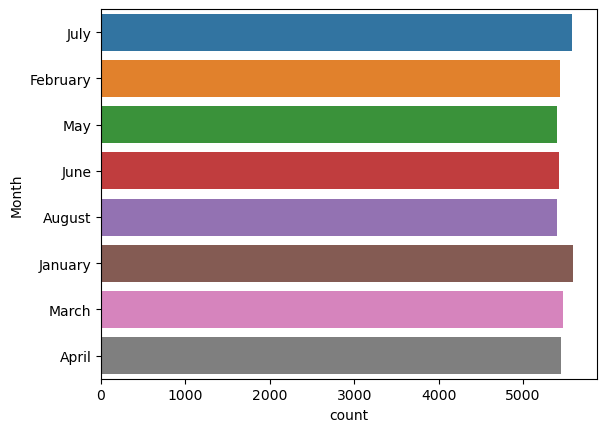

In [156]:
sns.countplot(y='Month',data=df)

<Axes: >

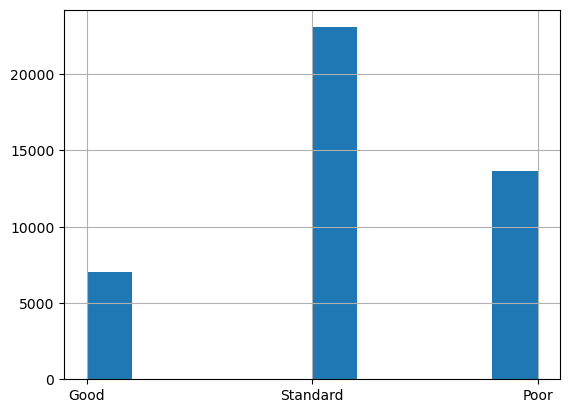

In [157]:
df['Credit_Score'].hist()

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

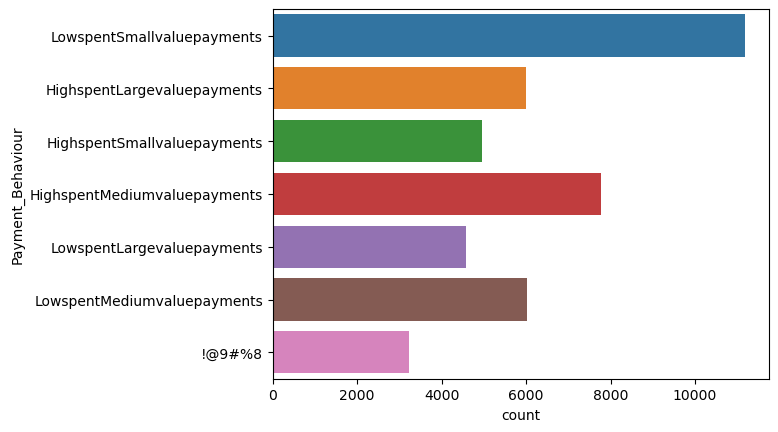

In [158]:
sns.countplot(y='Payment_Behaviour',data=df)

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

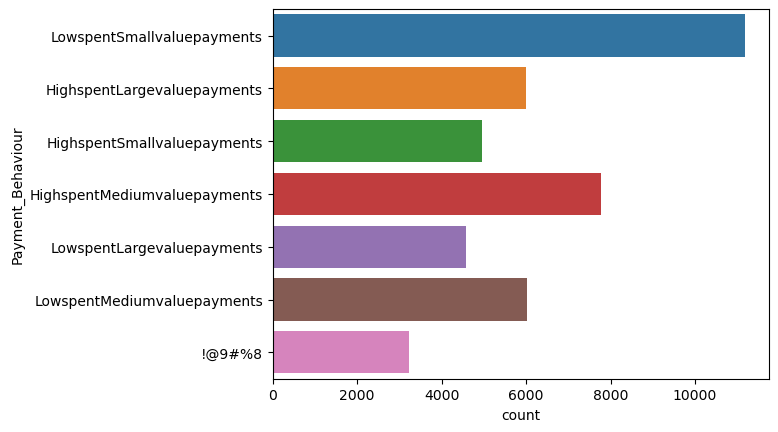

In [159]:
sns.countplot(y='Payment_Behaviour',data=df)

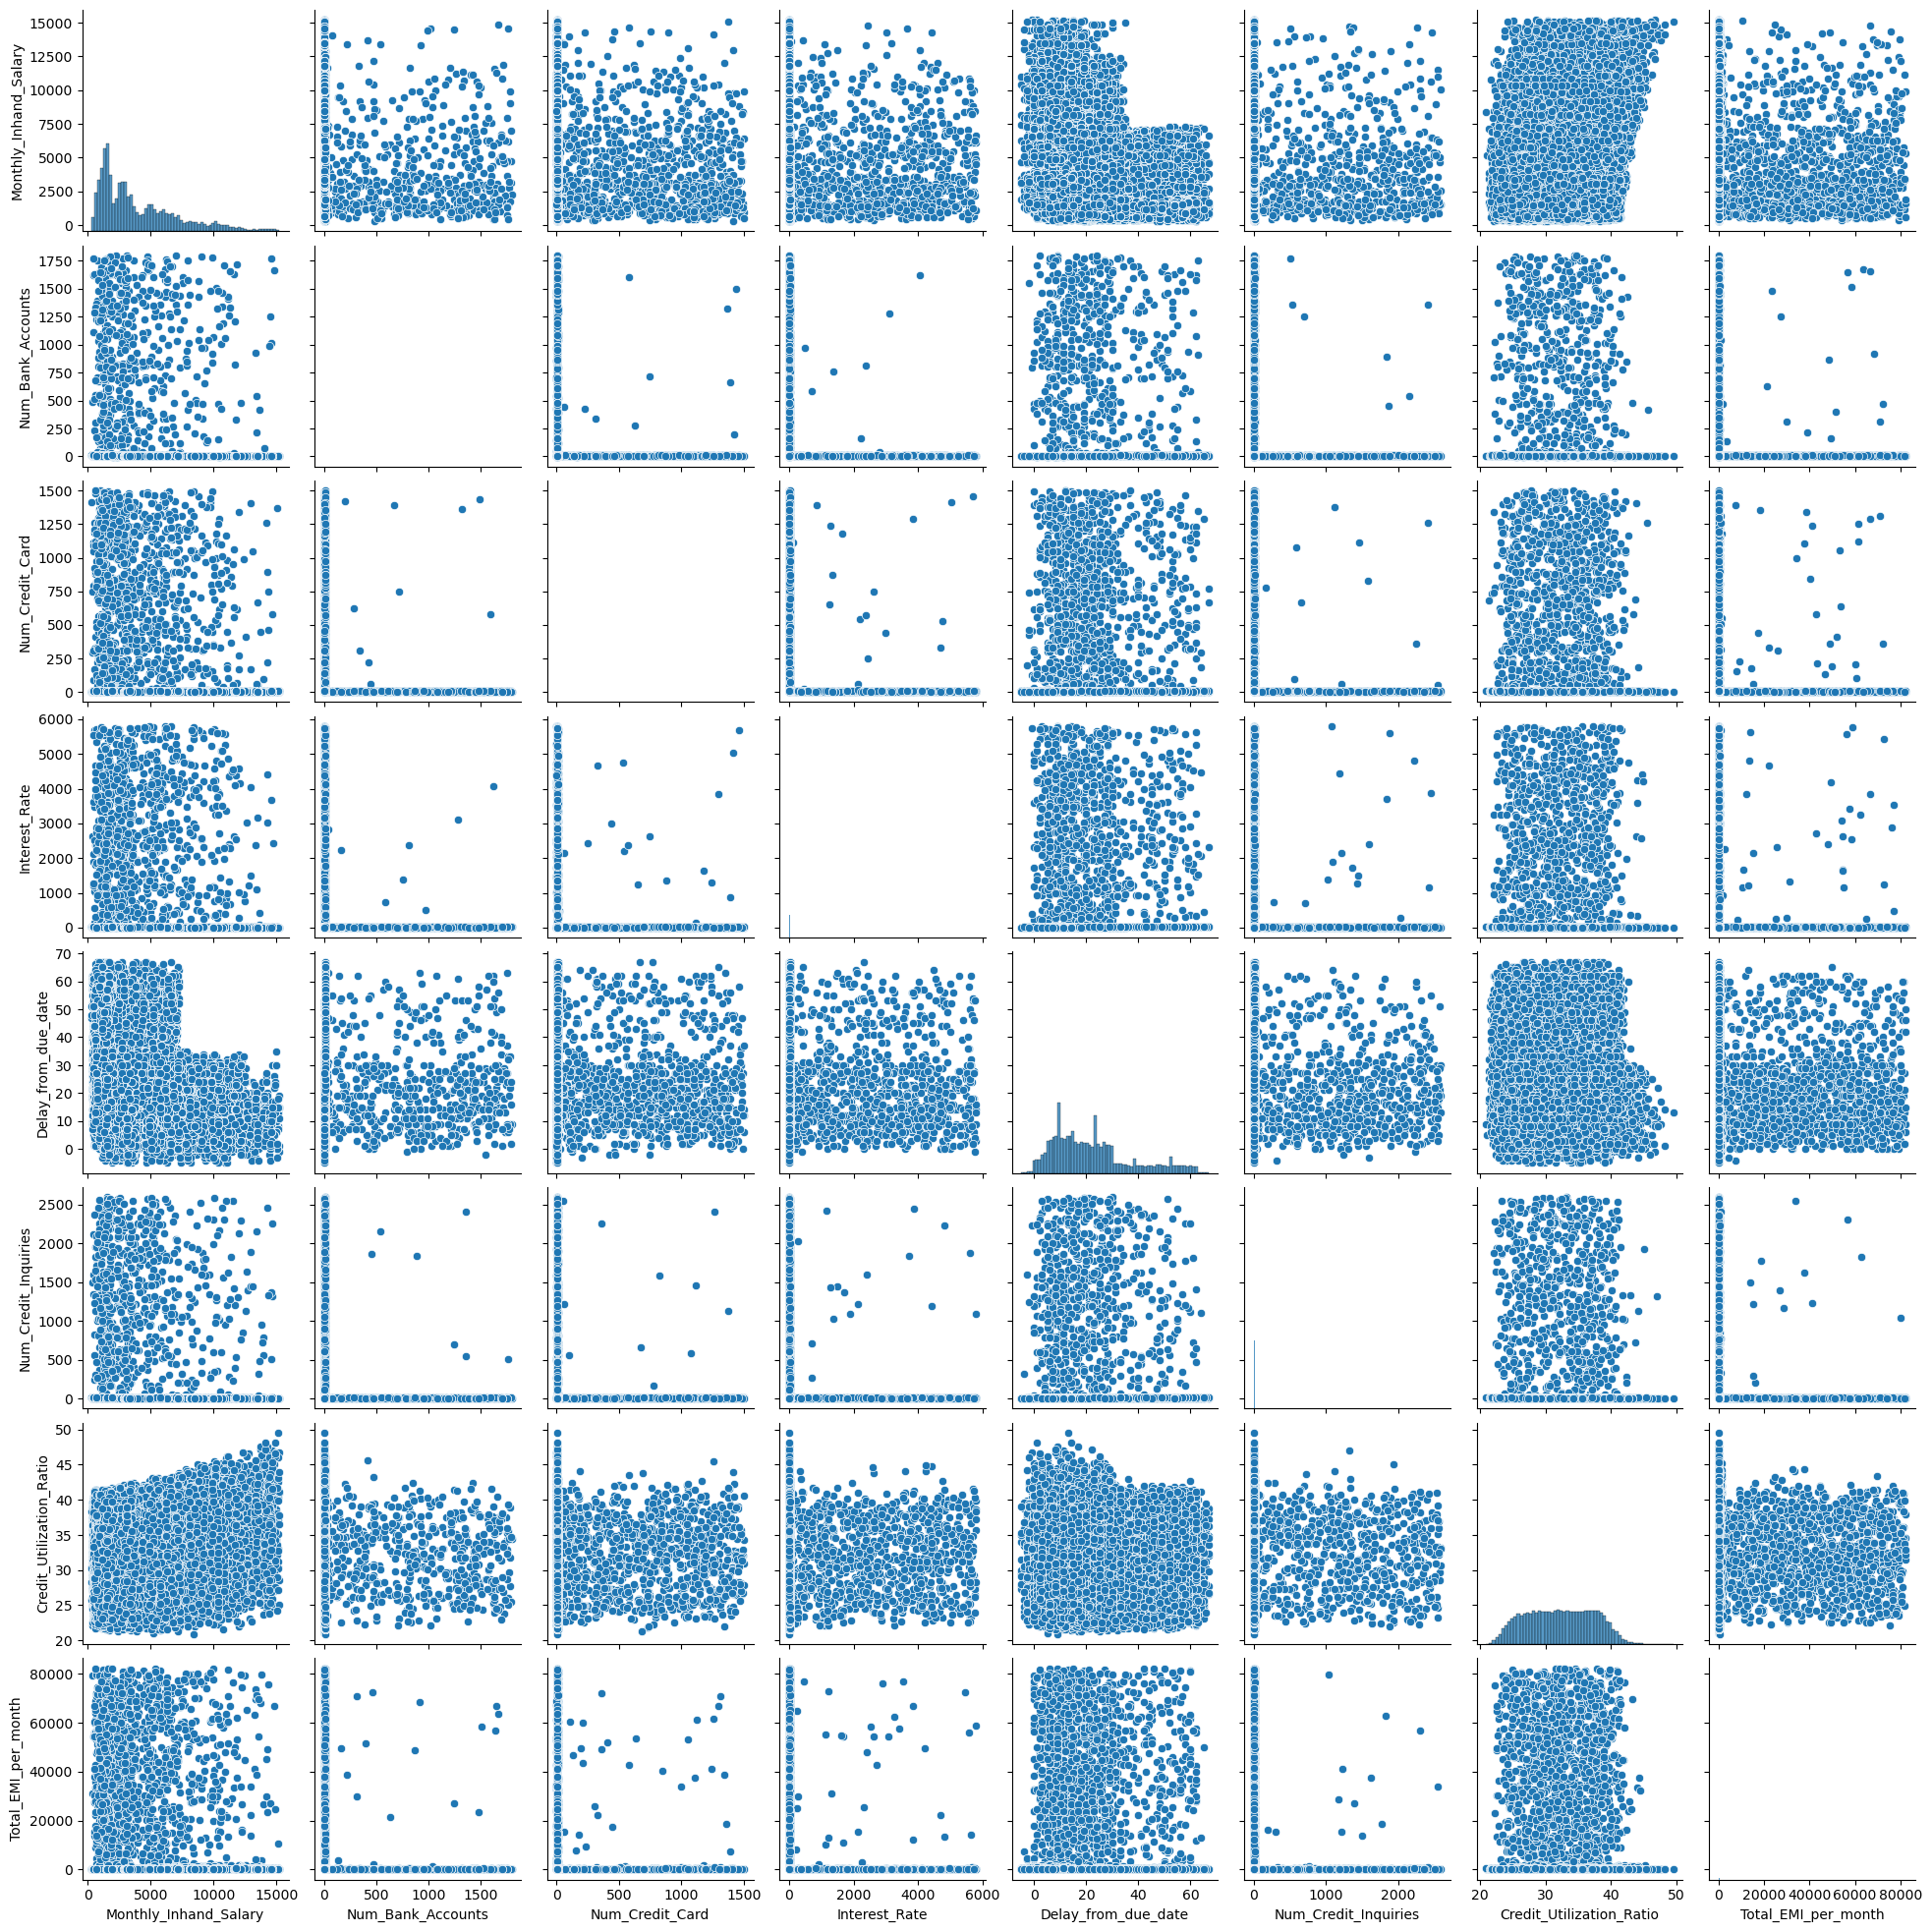

In [160]:
sns.pairplot(df)

In [162]:
x = df.drop(columns='Credit_Score')
y = df['Credit_Score']

In [163]:
x = x.replace('',np.nan).astype(float)

In [164]:
x.isnull().sum()

Month                         0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary         0
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                  0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Changed_Credit_Limit        921
Num_Credit_Inquiries          0
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly       0
Payment_Behaviour             0
Monthly_Balance               0
dtype: int64

In [165]:
x['Changed_Credit_Limit'].fillna(0,inplace=True)

In [166]:
x.isnull().sum()

Month                       0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [167]:
x

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
6,4.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,127.0,3.0,...,4.0,1.0,809.98,22.537593,188.0,1.0,49.574949,178.344067,6.0,244.565317
9,2.0,13.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,677.0,7.0,...,2.0,1.0,605.03,38.550848,237.0,1.0,18.816215,40.391238,1.0,484.591214
12,7.0,13.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,677.0,3.0,...,2.0,1.0,605.03,34.977895,230.0,1.0,18.816215,130.115420,6.0,444.867032
13,5.0,13.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,677.0,3.0,...,2.0,1.0,605.03,33.381010,239.0,1.0,18.816215,43.477190,1.0,481.505262
15,1.0,13.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,677.0,3.0,...,2.0,1.0,605.03,32.933856,243.0,1.0,18.816215,218.904344,6.0,356.078109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,2.0,1.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,4885.0,33.0,...,9.0,0.0,3571.70,39.772607,355.0,2.0,12112.000000,148.275233,6.0,273.750662
99986,6.0,1.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,4885.0,33.0,...,9.0,0.0,3571.70,24.713861,346.0,2.0,60.964772,76.282793,6.0,345.743101
99991,1.0,1.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,4885.0,33.0,...,9.0,0.0,3571.70,37.140784,361.0,2.0,60.964772,34.662906,1.0,337.362988
99997,5.0,9.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,676.0,27.0,...,3.0,1.0,502.38,41.255522,309.0,1.0,35.104023,24.028477,1.0,516.809083


In [168]:
# Data Normalization
scaler = StandardScaler()
scaler.fit_transform(x)
x

,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
6,4.0,12.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,127.0,3.0,...,4.0,1.0,809.98,22.537593,188.0,1.0,49.574949,178.344067,6.0,244.565317
9,2.0,13.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,677.0,7.0,...,2.0,1.0,605.03,38.550848,237.0,1.0,18.816215,40.391238,1.0,484.591214
12,7.0,13.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,677.0,3.0,...,2.0,1.0,605.03,34.977895,230.0,1.0,18.816215,130.115420,6.0,444.867032
13,5.0,13.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,677.0,3.0,...,2.0,1.0,605.03,33.381010,239.0,1.0,18.816215,43.477190,1.0,481.505262
15,1.0,13.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,677.0,3.0,...,2.0,1.0,605.03,32.933856,243.0,1.0,18.816215,218.904344,6.0,356.078109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,2.0,1.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,4885.0,33.0,...,9.0,0.0,3571.70,39.772607,355.0,2.0,12112.000000,148.275233,6.0,273.750662
99986,6.0,1.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,4885.0,33.0,...,9.0,0.0,3571.70,24.713861,346.0,2.0,60.964772,76.282793,6.0,345.743101
99991,1.0,1.0,20002.88,1929.906667,10.0,8.0,29.0,5.0,4885.0,33.0,...,9.0,0.0,3571.70,37.140784,361.0,2.0,60.964772,34.662906,1.0,337.362988
99997,5.0,9.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,676.0,27.0,...,3.0,1.0,502.38,41.255522,309.0,1.0,35.104023,24.028477,1.0,516.809083


In [170]:
# Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# ML Models

In [171]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
Rmodel = RandomForestClassifier(n_estimators=100,random_state=42)
Rmodel.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [172]:
predict = Rmodel.predict(x_test)
predict

array(['Poor', 'Standard', 'Poor', ..., 'Good', 'Standard', 'Standard'],
      dtype=object)

In [173]:
Rscore = accuracy_score(y_test,predict)*100
Rscore

78.06215722120659

In [174]:
cm = confusion_matrix(y_test,predict)
cm

array([[1001,   12,  417],
       [  62, 2150,  476],
       [ 338,  615, 3681]], dtype=int64)

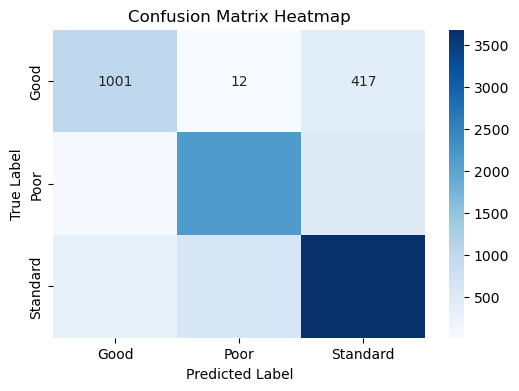

In [194]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [176]:
Amodel = AdaBoostClassifier(n_estimators=100)
Amodel.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [177]:
Apredict = Amodel.predict(x_test)
Apredict

array(['Good', 'Standard', 'Poor', ..., 'Good', 'Good', 'Poor'],
      dtype=object)

In [178]:
Ascore = accuracy_score(y_test,Apredict)*100
Ascore 

65.41361974405851

In [179]:
from sklearn.neighbors import KNeighborsClassifier
Kmodel = KNeighborsClassifier(n_neighbors=5)
Kmodel.fit(x_train,y_train)

KNeighborsClassifier()

In [180]:
Kpredict = Kmodel.predict(x_test)
Kpredict

array(['Standard', 'Good', 'Poor', ..., 'Good', 'Good', 'Poor'],
      dtype=object)

In [181]:
kscore = accuracy_score(y_test,Kpredict)*100
kscore

65.12797074954297

In [182]:
kcm = confusion_matrix(y_test,Kpredict)
kcm

array([[ 688,   99,  643],
       [ 143, 1795,  750],
       [ 538,  879, 3217]], dtype=int64)

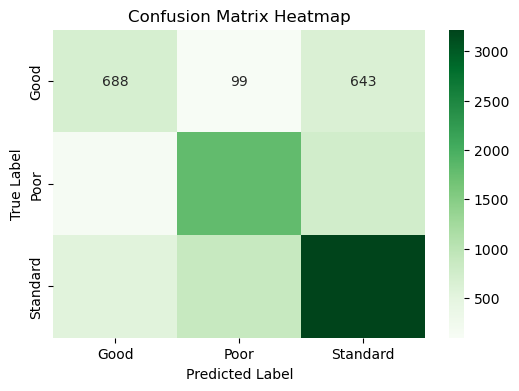

In [196]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))  
sns.heatmap(kcm, annot=True, fmt="d", cmap="Greens",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [184]:
from sklearn.tree import DecisionTreeClassifier
Dmodel = DecisionTreeClassifier()
Dmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [185]:
Dpredict = Dmodel.predict(x_test)
Dpredict

array(['Poor', 'Standard', 'Poor', ..., 'Good', 'Good', 'Standard'],
      dtype=object)

In [186]:
Dscore = accuracy_score(y_test,Dpredict)*100
Dscore

67.3674588665448

In [197]:
dcm = confusion_matrix(y_test,Dpredict)
dcm

array([[ 850,   88,  492],
       [  98, 1726,  864],
       [ 475,  839, 3320]], dtype=int64)

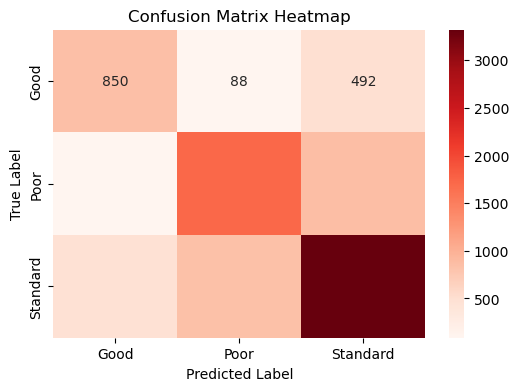

In [200]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))  
sns.heatmap(dcm, annot=True, fmt="d", cmap="Reds",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [187]:
from sklearn.svm import SVC
smodel = SVC()
smodel.fit(x_train,y_train)


SVC()

In [188]:
spredict = smodel.predict(x_test)
spredict

array(['Standard', 'Standard', 'Standard', ..., 'Standard', 'Standard',
       'Standard'], dtype=object)

In [189]:
Sscore = accuracy_score(y_test,spredict)*100
Sscore

52.947897623400365

In [201]:
scm = confusion_matrix(y_test,spredict)
scm

array([[   0,    0, 1430],
       [   0,    0, 2688],
       [   0,    0, 4634]], dtype=int64)

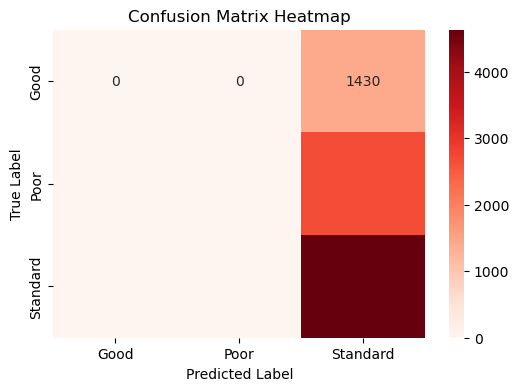

In [203]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))  
sns.heatmap(scm, annot=True, fmt="d", cmap="Reds",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()